# Cell-cell interaction analysis and visualization
---
First, we will import our spatial pre-processing script and run binSpect:

In [1]:
source("scripts//spatial_pre_process.R")

# identify genes with a spatial coherent expression profile
km_spatialgenes = binSpect(my_giotto_object, bin_method = 'kmeans')

Skipping install of 'Giotto' from a github remote, the SHA1 (1b60529f) has not changed since last install.
  Use `force = TRUE` to force installation




 giotto environment found at 
 /Users/natalie_dr/Library/r-miniconda/envs/giotto_env/bin/pythonw 
Giotto environment is already installed, set force_environment = TRUE to reinstall 
Consider to install these (optional) packages to run all possible Giotto commands:  tiff biomaRt trendsceek multinet RTriangle FactoMiner
 Giotto does not automatically install all these packages as they are not absolutely required and this reduces the number of dependencies
 no external python path was provided, but a giotto python environment was found and will be used 

 first scale genes and then cells 
return_plot = TRUE and return_gobject = TRUE 

          plot will not be returned to object, but can still be saved with save_plot = TRUE or manually 
hvg  was found in the gene metadata information and will be used to select highly variable genes 


Warning message in (function (A, nv = 5, nu = nv, maxit = 1000, work = nv + 7, reorth = TRUE, :
“You're computing too large a percentage of total singular values, use a standard svd instead.”



 This is the single parameter version of binSpect
 1. matrix binarization complete 

 2. spatial enrichment test completed 

 3. (optional) average expression of high expressing cells calculated 

 4. (optional) number of high expressing cells calculated 


### 1. Cell-cell interaction

Now, we'll run [cell proximity enrichment](https://rubd.github.io/Giotto_site/reference/cellProximityEnrichment.html) to assess cell-cell interaction:

In [2]:
set.seed(seed = 2841)
cell_proximities = cellProximityEnrichment(gobject = my_giotto_object,
                                           cluster_column = 'cell_types',
                                           spatial_network_name = 'Delaunay_network',
                                           adjust_method = 'fdr',
                                           number_of_simulations = 1000)

### 2. Visualize cell-cell interaction

We'll use a variety of different visualizations to inspect our cell-cell interaction:
- [proximity barplot](https://rubd.github.io/Giotto_site/reference/cellProximityBarplot.html)
- [proximity heatmap](https://rubd.github.io/Giotto_site/reference/cellProximityHeatmap.html)
- [proximity network](https://rubd.github.io/Giotto_site/reference/cellProximityNetwork.html)

named list()

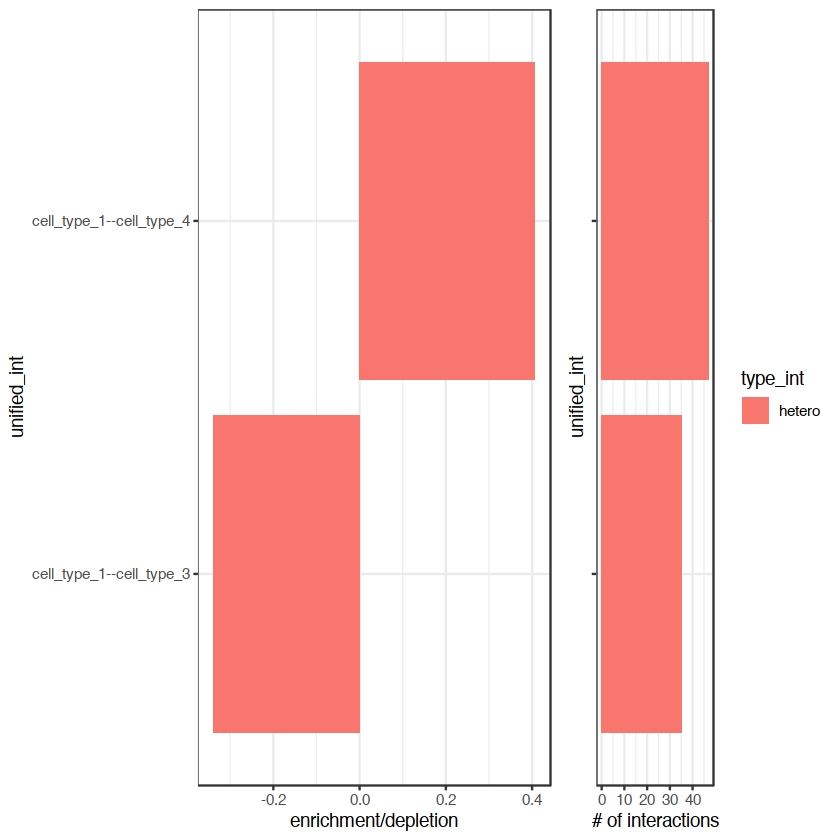

In [3]:
# barplot
cellProximityBarplot(gobject = my_giotto_object, 
                     CPscore = cell_proximities, 
                     min_orig_ints = 3, min_sim_ints = 3)[0]

In [6]:
cell_proximities

unified_int,type_int,round,V1,orig
<chr>,<chr>,<chr>,<dbl>,<chr>
cell_type_3--cell_type_3,homo,original,23,original
cell_type_2--cell_type_3,hetero,original,52,original
cell_type_1--cell_type_2,hetero,original,43,original
cell_type_1--cell_type_1,homo,original,24,original
cell_type_1--cell_type_4,hetero,original,47,original
cell_type_1--cell_type_3,hetero,original,35,original
cell_type_2--cell_type_4,hetero,original,33,original
cell_type_3--cell_type_4,hetero,original,32,original
cell_type_4--cell_type_4,homo,original,10,original


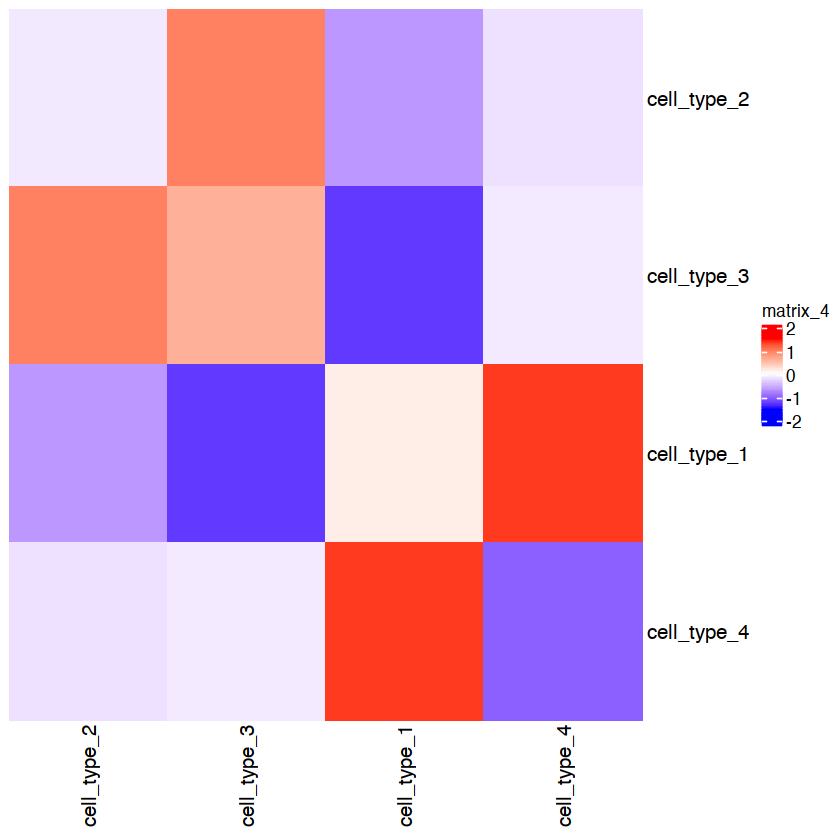

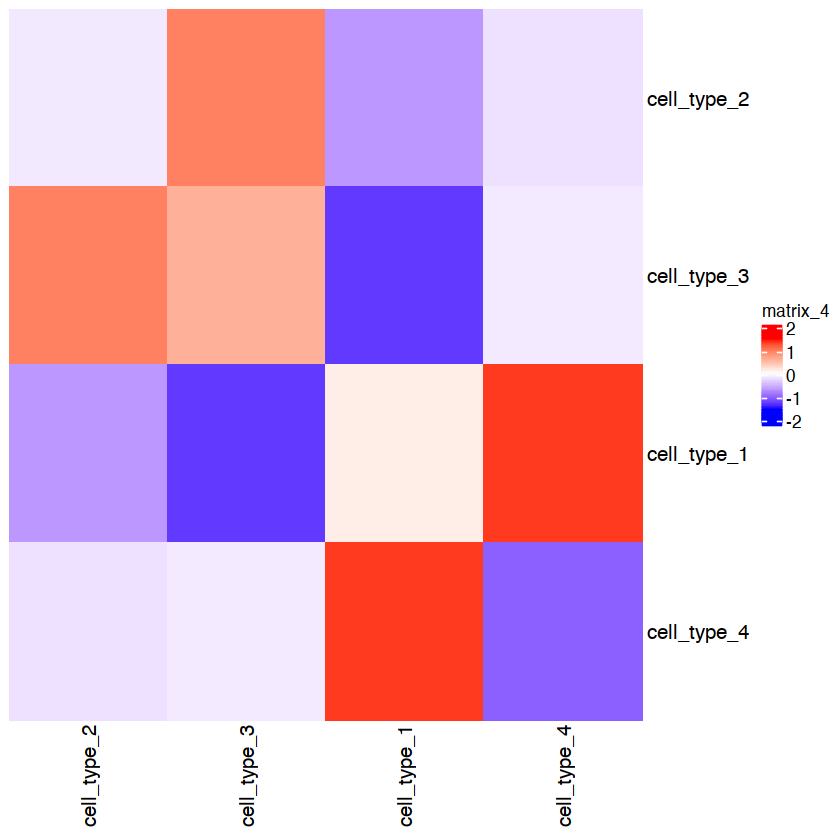

In [8]:
# heatmap
cellProximityHeatmap(gobject = my_giotto_object, 
                     CPscore = cell_proximities, 
                     order_cell_types = T, scale = T,
                     color_breaks = c(-1.5, 0, 1.5), 
                     color_names = c('blue', 'white', 'red'))

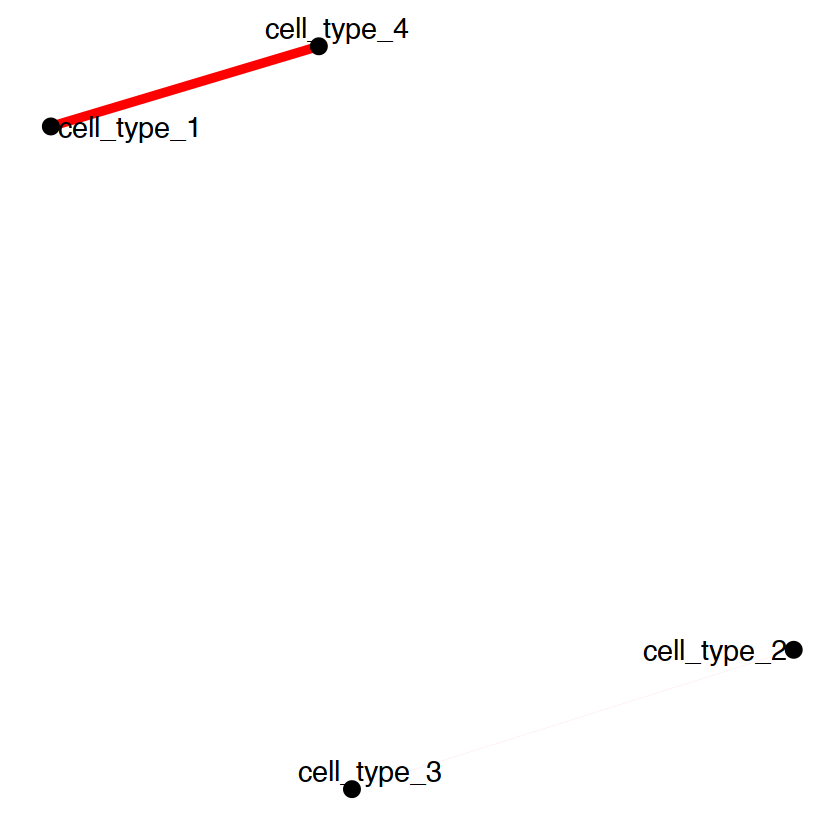

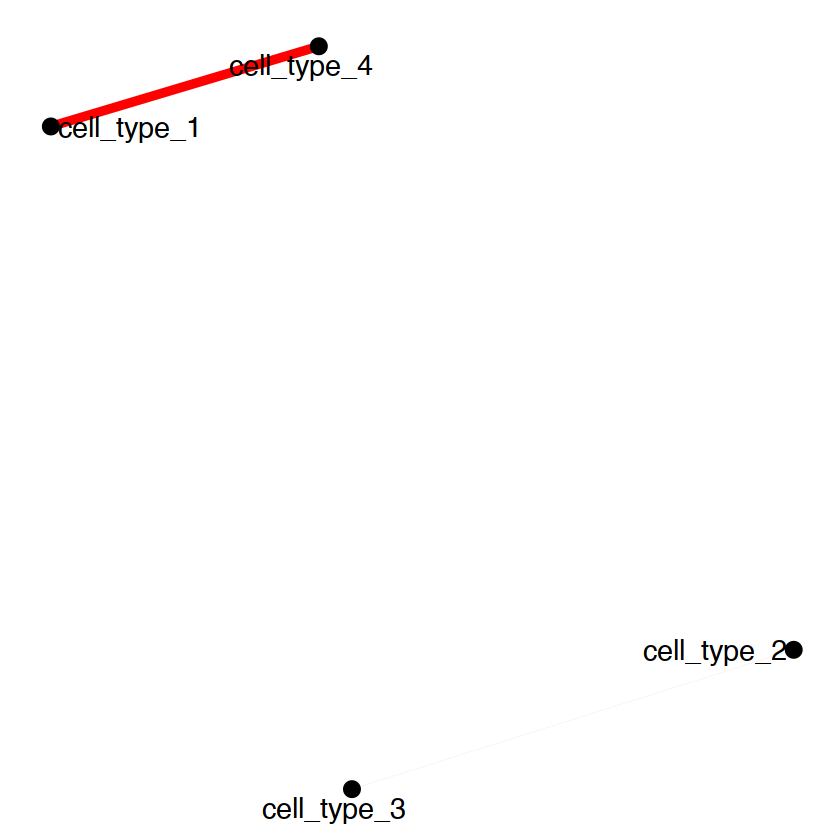

In [10]:
# network
cellProximityNetwork(gobject = my_giotto_object, 
                     CPscore = cell_proximities, 
                     remove_self_edges = T, only_show_enrichment_edges = T)

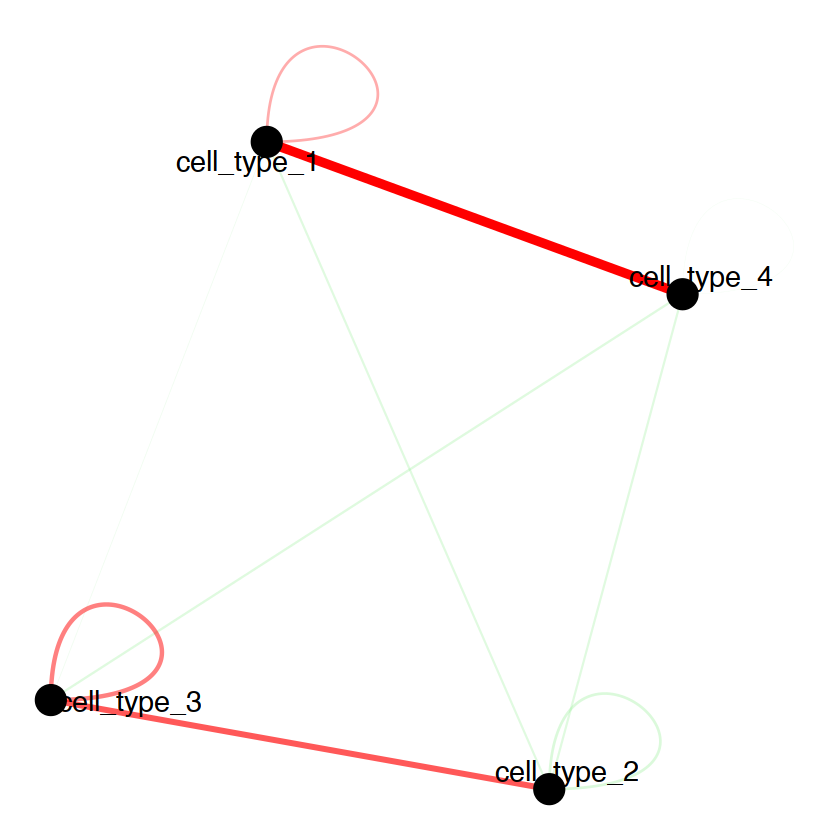

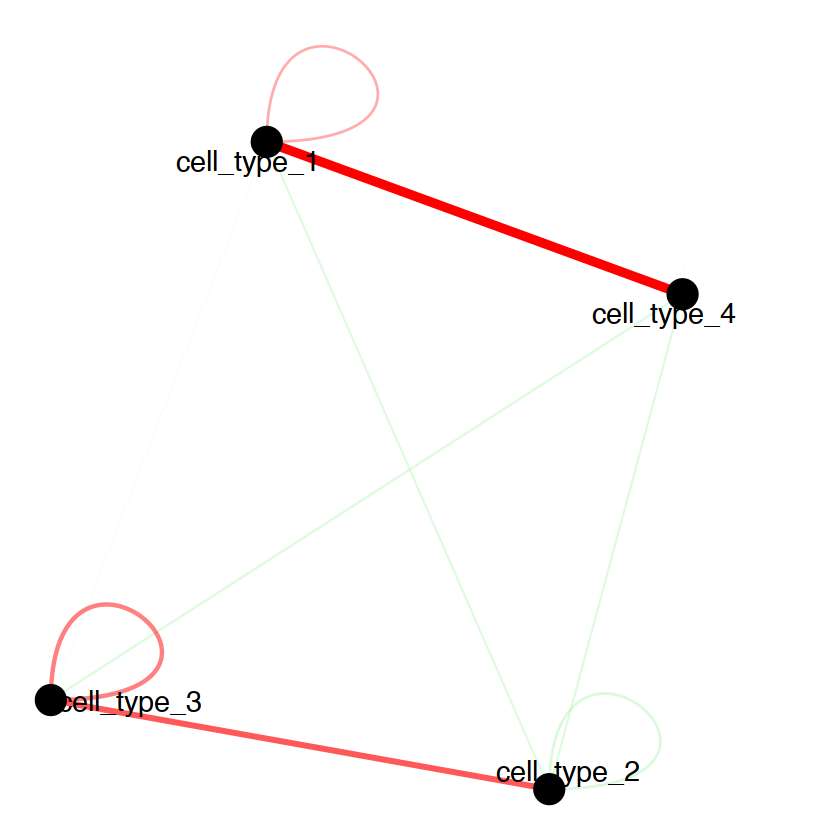

In [11]:
# network with self-edges
cellProximityNetwork(gobject = my_giotto_object, 
                     CPscore = cell_proximities,
                     remove_self_edges = F, self_loop_strength = 0.3,
                     only_show_enrichment_edges = F,
                     rescale_edge_weights = T,
                     node_size = 8,
                     edge_weight_range_depletion = c(1, 2),
                     edge_weight_range_enrichment = c(2,5))

### 3. Visualize at the spatial level

named list()

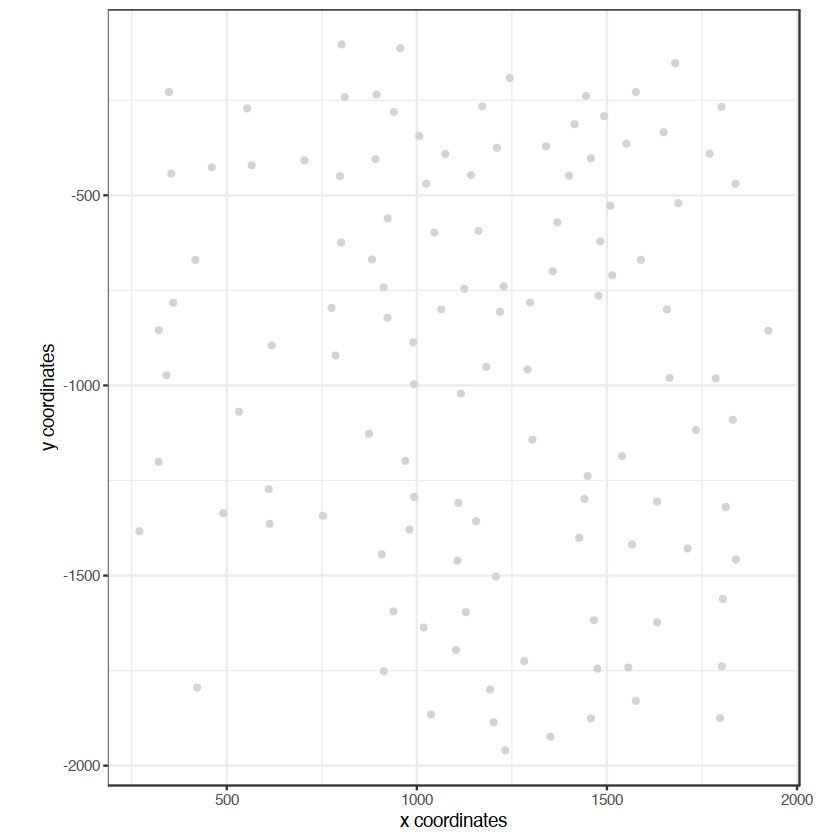

In [15]:
# Option 1
spec_interaction = "cell D--cell F"
cellProximitySpatPlot2D(gobject = my_giotto_object,
                        interaction_name = spec_interaction,
                        show_network = T,
                        cluster_column = 'cell_types',
                        cell_color = 'cell_types',
                        cell_color_code = c('cell D' = 'lightblue', 'cell F' = 'red'),
                        point_size_select = 4, point_size_other = 2)[0]

In [16]:
# Option 2: create additional metadata
my_giotto_object = addCellIntMetadata(my_giotto_object,
                             spatial_network = 'Delaunay_network',
                             cluster_column = 'cell_types',
                             cell_interaction = spec_interaction,
                             name = 'D_F_interactions')


spatPlot(my_giotto_object, cell_color = 'D_F_interactions', legend_symbol_size = 3,
         select_cell_groups =  c('other_cell D', 'other_cell F', 'select_cell D', 'select_cell F'))

# throws error - check colab notes

ERROR: Error in apply(dist_mat, 1, function(x) min(x)): dim(X) must have a positive length
